In [4]:
import medmnist
from medmnist import INFO, Evaluator
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, ConcatDataset, random_split
import torchvision.transforms as transforms
import numpy as np
from torchvision.models import resnet18
import matplotlib.pyplot as plt


In [5]:
# Load organAMNIST dataset
data_flag = 'breastmnist'
download = True
info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])
num_classes = len(info['label'])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1))  # Repeat the single channel 3 times
])

train_dataset = DataClass(split='train', download=download, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=False)
test_dataset = DataClass(split='test', download=download, transform=transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)
val_dataset = DataClass(split='val', download=download, transform=transform)
val_loader = DataLoader(dataset=val_dataset, batch_size=128, shuffle=False)

In [6]:
info

{'python_class': 'BreastMNIST',
 'description': 'The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.',
 'url': 'https://zenodo.org/records/10519652/files/breastmnist.npz?download=1',
 'MD5': '750601b1f35ba3300ea97c75c52ff8f6',
 'url_64': 'https://zenodo.org/records/10519652/files/breastmnist_64.npz?download=1',
 'MD5_64': '742edef2a1fd1524b2efff4bd7ba9364',
 'url_128': 'https://zenodo.org/records/10519652/files/breastmnist_128.npz?download=1',
 'MD5_128': '363e4b3f8d712e9b5de15470a2aaadf1',
 'url_224': 'https://zenodo.org/records/10519652/files/breastmnist_224.npz?download=1',
 'MD5_224

In [14]:
# Sum the unique counts of the three datasets
unique_counts = (
	np.unique_counts(train_dataset.labels)[1] +
	np.unique_counts(val_dataset.labels)[1] +
	np.unique_counts(test_dataset.labels)[1]
)

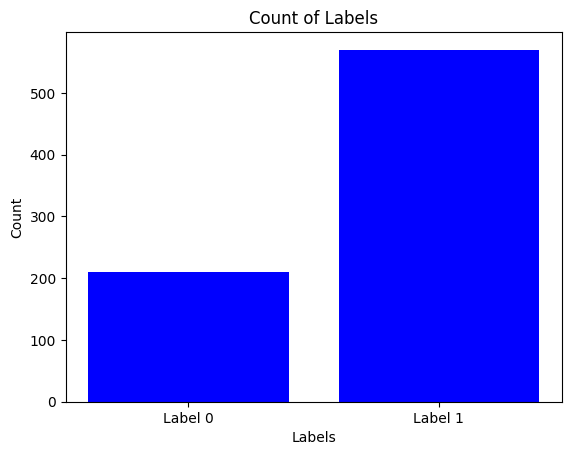

In [13]:
labels = ['Label 0', 'Label 1']
plt.bar(labels, unique_counts, color='blue')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Labels')
plt.show()

In [8]:
unique_counts

array([210, 570])

In [ ]:
plt.bar(unique_counts, color='blue')

TypeError: barh() missing 1 required positional argument: 'width'